In [48]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


#importing sklearn for data spliting
from sklearn.model_selection import train_test_split

#To declare random state we are initializing the random state variable to studentid
student_id=20026983

titanic = pd.read_csv('./Titanic.csv')


titanic['sex'] = titanic['sex'].map({'female': 0, 'male': 1})  # Convert 'sex' to numerical values.
titanic['pclass'] = titanic['pclass'].map({'1st': 0, '2and': 1, '3rd': 2})  # Convert "pclass" to numerical values.

# Display the first few rows of the dataframe
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,0.0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,0.0,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,0.0,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,0.0,0,"Allison, Mr. Hudson Joshua Crei",1,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,0.0,0,"Allison, Mrs. Hudson J C (Bessi",0,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Step 1

In [49]:
def QuantileBinning(feature, bin_number):
    """
    This function takes a numerical feature and the number of bins, and
    returns the feature binned into quantile-based bins.

    Parameters:
    - feature (pandas.Series): The numerical feature to be binned.
    - bin_number (int): The number of quantile bins.

    Returns:
    - pandas.Series: A series of discrete features binned by quantile.
    """
    # Use qcut to create quantile-based bins for the feature
    # If there are fewer unique values than bins, qcut could throw an error.
    # 'duplicates' parameter handles this by dropping redundant bins.
    return pd.qcut(feature, q=bin_number, labels=False, duplicates='drop')

# One example
feature_test = pd.DataFrame(np.random.rand(100),  columns=['Column_A'])
feature_test_discrete = QuantileBinning(feature_test['Column_A'], 10)

def label_encoder(feature):
    unique_labels = pd.unique(feature)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    transformed_feature = np.array([label_to_int[label] for label in feature])
    return transformed_feature

In [50]:
# Fill missing values in 'age' with the average age
average_age=titanic["age"].mean()
#print(average_age)
titanic["age"]=titanic["age"].fillna(average_age)


average_pclass=titanic["pclass"].mean()
#print(average_age)
titanic["pclass"]=titanic["pclass"].fillna(average_pclass)


#Checking if column has any missing values
#has_any_missing_values=titanic["age"].isnull().any()
#print(has_any_missing_values)

# Discretization

titanic["age"]=QuantileBinning(titanic["age"],10)
#print(titanic['age'])


titanic_features = titanic[['pclass', 'sex', 'age', 'sibsp']]
titanic_target = titanic['survived']

# Split the data into training and test sets using an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(titanic_features, titanic_target, test_size=0.2,random_state=student_id)

#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

In [4]:
training.head()

,pclass,sex,age,sibsp,survived
1148,2,1,6,0,0
1049,2,1,1,1,1
982,2,1,4,0,0
808,2,1,4,0,0
1195,2,1,4,0,0


# Step 2

In [52]:
# define your entropy function and information gain function

# Calculate Information Gain for each feature in the training set
# Define entropy function
def entropy(y):
    """
    Calculate the entropy of a given set of labels.

    Parameters:
    y (array-like): Labels of the dataset.

    Returns:
    float: Entropy value.
    """
    #calculates unique values and their counts
    unique_labels, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    #calculates the entrophy formula.
    entropy_value = -np.sum(probabilities * np.log2(probabilities))
    #return
    return entropy_value

def information_gain(X, y, feature_name):
    # Calculate total entropy before splitting
    total_entropy = entropy(y)
    
    # Calculate weighted entropy after splitting on the feature
    weighted_entropy = 0
    unique_values = X[feature_name].unique()
    for value in unique_values:
        # Identify indices of samples where the feature equals the current value
        subset_indices = X[feature_name] == value

        # Calculate the entropy of the target variable for the subset defined by the current feature value
        subset_entropy = entropy(y[subset_indices])

        # Calculate the weighted entropy of the subset
        # Weighted entropy = (proportion of subset) * (entropy of subset)
        #print("sdfa :",subset_entropy)
        weighted_entropy += (np.sum(subset_indices) / len(y)) * subset_entropy

    # Information gain is the difference between the total entropy and the weighted entropy
    info_gain = total_entropy - weighted_entropy
    #print("Info gain :", info_gain)
    return info_gain

#Entrophy Values.
for feature in X_train.columns:
    #print(feature,type(np.array(X_train[feature])))
    class_entropy=entropy(X_train[[feature]])
    #print(feature,class_entropy)

# Calculate Information Gain for each feature in the training set
information_gains = {}
for feature_name in X_train.columns:
    information_gains[feature_name] = information_gain(X_train, y_train, feature_name)

# Print information gains for each feature
for feature_name, gain in information_gains.items():
    print(f"Information Gain for {feature_name}: {gain}")

'''
Storing Orginal output for comaprision
{'pclass': 0.07175330504636224,
 'sex': 0.2319449106625785,
 'age': 0.02055919966242481,
 'sibsp': 0.029840807548709658}
'''

Information Gain for pclass: 0.0776215557268668
Information Gain for sex: 0.2085477741274775
Information Gain for age: 0.01888240437546762
Information Gain for sibsp: 0.032679756786733405


"\nStoring Orginal output for comaprision\n{'pclass': 0.07175330504636224,\n 'sex': 0.2319449106625785,\n 'age': 0.02055919966242481,\n 'sibsp': 0.029840807548709658}\n"

In [6]:
info_gains

{'pclass': 0.07175330504636224,
 'sex': 0.2319449106625785,
 'age': 0.02055919966242481,
 'sibsp': 0.029840807548709658}

So the first split should be "sex"

# Step 3

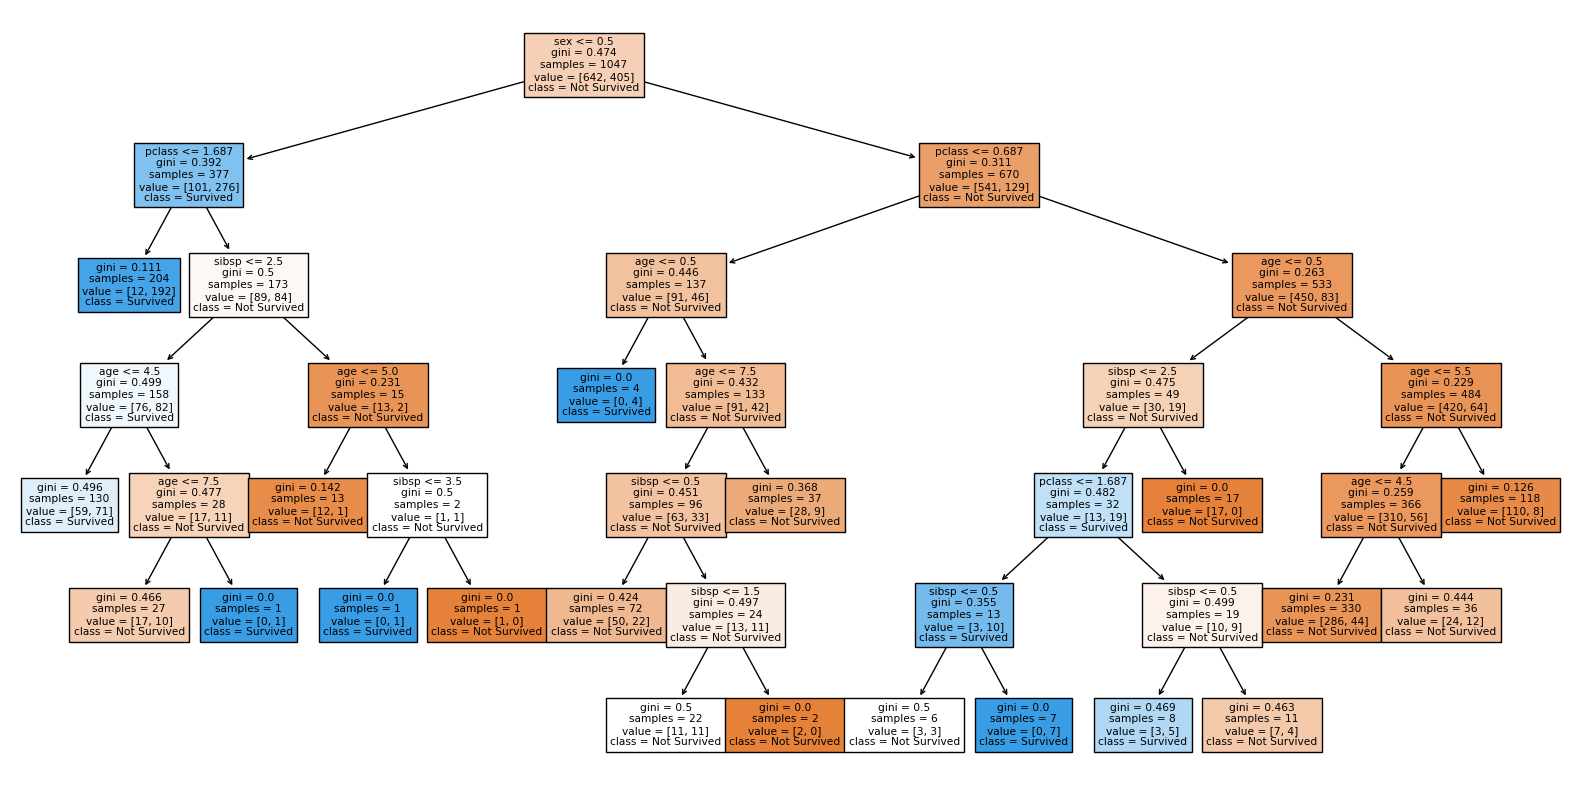

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree #sklearn.metrics is not imported !!!
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#Setting random State.
student_id=20026983

# Instantiate DecisionTreeClassifier with the specified parameters
decision_tree = DecisionTreeClassifier(max_leaf_nodes=20, random_state=student_id)

# Train the decision tree model
decision_tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()



In [54]:
# Define your performance metrics including accuracy, precision, recall and F1-scorre
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_model(model,X_test,y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision
    precision = precision_score(y_test, y_pred)

    # Calculate recall
    recall = recall_score(y_test, y_pred)

    # Calculate F1-score
    f1 = f1_score(y_test, y_pred)

    return accuracy,precision,recall,f1

accuracy,percision,recall,f1=evaluate_model(decision_tree,X_test,y_test)

print("Accuracy:", accuracy)
print("Precision:", percision)
print("Recall:", recall)
print("F1-score:", f1)


'''
Storing original values for comparsion.
{'Precision': {0.7325581395348837},
 'Recall': {0.5887850467289719},
 'F1 Score': {0.6528497409326425}}
'''

Accuracy: 0.8053435114503816
Precision: 0.7682926829268293
Recall: 0.6631578947368421
F1-score: 0.711864406779661


"\nStoring original values for comparsion.\n{'Precision': {0.7325581395348837},\n 'Recall': {0.5887850467289719},\n 'F1 Score': {0.6528497409326425}}\n"

# Step 4

Best max_leaf_nodes: 13


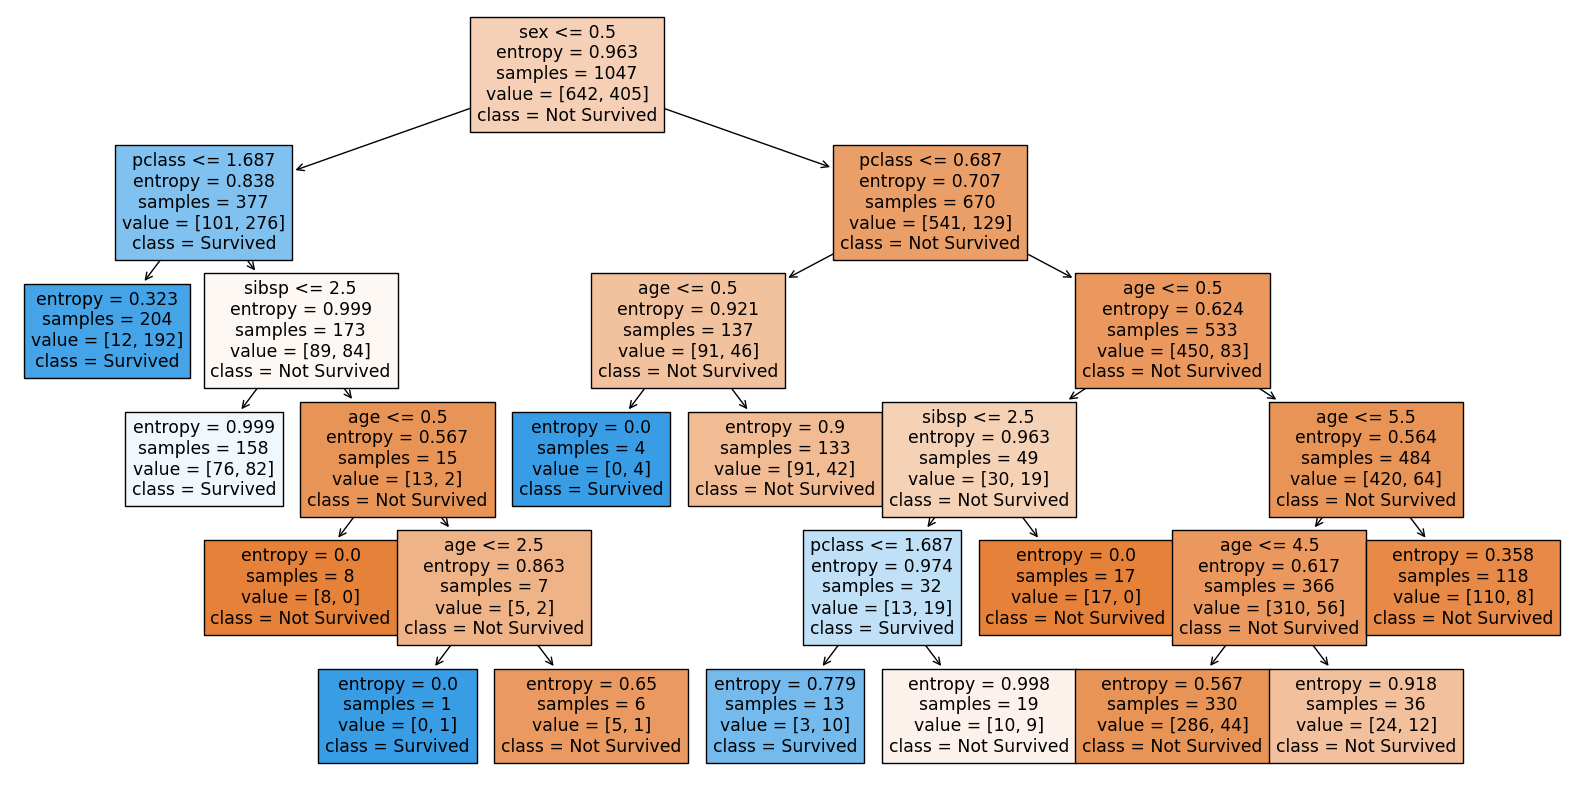

Performance of the pruned decision tree:
Accuracy: 0.8015267175572519
Precision: 0.7529411764705882
Recall: 0.6736842105263158
F1 Score: 0.7111111111111111


In [59]:
from sklearn.model_selection import GridSearchCV

# Define a range of max_leaf_nodes values to search
param_grid = {'max_leaf_nodes': list(range(5, 20))}

# Run grid search with cross-validation


# Get the best estimator with the optimal max_leaf_nodes parameter


# Plot the pruned decision tree


# Instantiate GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=student_id, splitter='best', criterion='entropy'),
                           param_grid=param_grid,
                           cv=5) # Use 5-fold cross-validation
                            

# Fit GridSearchCV to find the optimal max_leaf_nodes parameter
grid_search.fit(X_train, y_train)

# Get the best parameter
best_max_leaf_nodes = grid_search.best_params_['max_leaf_nodes']
print("Best max_leaf_nodes:", best_max_leaf_nodes)

# Instantiate the pruned decision tree with the best max_leaf_nodes parameter
pruned_decision_tree = DecisionTreeClassifier(max_leaf_nodes=best_max_leaf_nodes, random_state=student_id, splitter='best', criterion='entropy')

# Fit the pruned decision tree model
pruned_decision_tree.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_decision_tree, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Evaluate the pruned decision tree model
pruned_accuracy, pruned_precision, pruned_recall, pruned_f1 = evaluate_model(pruned_decision_tree, X_test, y_test)
print("Performance of the pruned decision tree:")
print("Accuracy:", pruned_accuracy)
print("Precision:", pruned_precision)
print("Recall:", pruned_recall)
print("F1 Score:", pruned_f1)


# Step 5


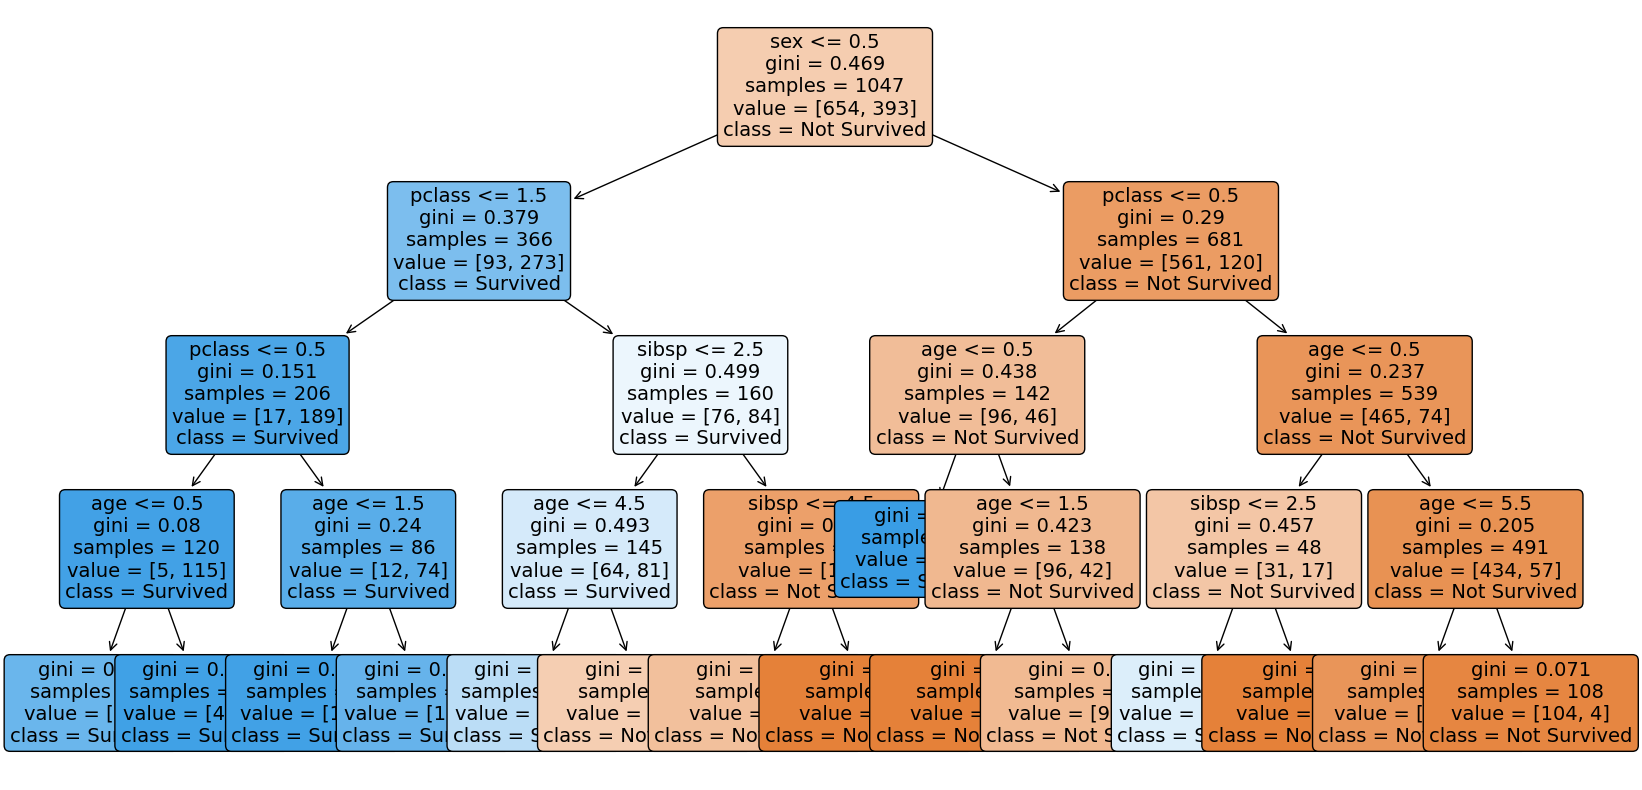

In [10]:
## it's an example (max_depth)

In [56]:
def ensemble_vote(models, X):
    # Perform majority vote
    # For each sample, count the votes for each class (0 or 1)
    votes = []
    for model in models:
        predictions = model.predict(X)
        votes.append(predictions)

    # Determine the winning class for each sample: it's the one with the most votes
    # If there's a tie, we choose the class with the highest index (1 in this case)
    ensemble_predictions = []

    #Unpacking iterable objects votes.
    for pred_tuple in zip(*votes):
        # Count the occurrences of each class label in the tuple
        counts = Counter(pred_tuple)

        # Get the most common class label (the one with the highest count)
        majority_vote = counts.most_common(1)[0][0]
        ensemble_predictions.append(majority_vote)

    return ensemble_predictions


# Instantiate the DecisionTreeClassifier for the additional models, by changing the depth and criterion.
decision_tree_two = DecisionTreeClassifier(max_depth=5, random_state=student_id, splitter='random', criterion='gini')
decision_tree_three = DecisionTreeClassifier(max_depth=10, random_state=student_id, splitter='best', criterion='gini')

# Fit the additional decision tree models
decision_tree_two.fit(X_train, y_train)
decision_tree_three.fit(X_train, y_train)

# Use the defined function to get predictions from the ensemble of the three trees
models = [decision_tree, decision_tree_two, decision_tree_three]
ensemble_predictions = ensemble_vote(models, X_test)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions)
recall = recall_score(y_test, ensemble_predictions)
f1 = f1_score(y_test, ensemble_predictions)

print("Ensemble Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

'''
{'Precision': {0.7047619047619048},
 'Recall': {0.6915887850467289},
 'F1 Score': {0.6981132075471698}}
'''

Ensemble Model Performance:
Accuracy: 0.8091603053435115
Precision: 0.7710843373493976
Recall: 0.6736842105263158
F1 Score: 0.7191011235955056


"\n{'Precision': {0.7047619047619048},\n 'Recall': {0.6915887850467289},\n 'F1 Score': {0.6981132075471698}}\n"

In [58]:
# Train a random forest model using the optimal tree you found in step 4 and compare the ensembled model with the random forest 
from sklearn.ensemble import RandomForestClassifier

# Instantiate RandomForestClassifier with the optimal parameters
random_forest = RandomForestClassifier(n_estimators=50, random_state=student_id)  # You can adjust n_estimators as needed

# Fit the Random Forest model on the training data
random_forest.fit(X_train, y_train)

# Predict on the test set
rf_predictions = random_forest.predict(X_test)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Model Performance:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

# Compare with the ensemble model and Pruned tree accuracy.
print("\nComparison with the Ensemble Model:")
print("Ensemble Model Accuracy:", accuracy)
print("Random Forest Model Accuracy:", rf_accuracy)
print("Pruned Tree Model Accuracy: ",pruned_accuracy)


Random Forest Model Performance:
Accuracy: 0.7824427480916031
Precision: 0.7261904761904762
Recall: 0.6421052631578947
F1 Score: 0.6815642458100558

Comparison with the Ensemble Model:
Ensemble Model Accuracy: 0.8091603053435115
Random Forest Model Accuracy: 0.7824427480916031
Pruned Tree Model Accuracy:  0.8015267175572519


#Conclusion:

Ensemble Tree model has more accuracy since collective wisdom of multiple base models, resulting in improved accuracy compared to individual models like Random Forest and Pruned Tree.